<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/After_asked_reviews_one_2022/A_BLUE_RAIN/Equations_FRANNK_LPSR_F18_180_5_cec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### DADOS DE ENTRADA 
function_select = 'F18'   
problem_size = 30 # possibles 2, 10, 20, 30, 50, 100
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=1000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
# fator = 1.0/3.0; 
fator = 1.0 # just LSHADE...
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;
mut_best  =0.5 ; crossp_best =0.5
maxNP = 180
minNP = 5
maxFES =300000
FIX = 100 # Number of adjusts random walk
H = 6
kH = 0 # kH is used to work with H  
terminal = 0.1
p=0.1
SF=[];SCR=[];MF=[];MCR=[];Xarq=[]
MFi=0.5
MCRi=0.5

In [2]:
  
def eqFRANNK(ref,c,yneural):
    # value ref (ref = CRa)  or (ref = Fa)
    # c = to choose CR or F
    # c = 1 it adjust and filter F 
    # c = 2 it adjust and filter CR
    # yneural > 0 increase parameter
    # yneural < 0 decrease parameter
    f1 =3.0; f2=1.0; f3=3.0; f4=1.0; Fc=0.1; Fd=0.05
    CRa = ref;CRo = ref; y_cod_CR = yneural
    Fa = ref; Fo = ref; y_cod_F = yneural
    if(c==1):
      if(y_cod_F>0):
        Fo=Fo*(1+Fd) #Fo=Fo+Fc
        Fo=(f1*Fo+f2*Fa)/(f1+f2) # para suavizar
        value  = Fo
      else:
        Fo=Fo*(1-Fd) #Fo=Fo-Fc
        Fo=(f1*Fo+f2*Fa)/(f1+f2) # para suavizar
        value = Fo
      if(Fo<Fa):# conferir a necessidade de melhorar 
        Fo=Fa+0.05
        value  = Fo
      if(Fo<Fc):
        Fo=(Fa+Fo)/2  # conferir a necessidade de melhorar
        value = CRo
      if(Fo> 1):
        Fo=1
        value = CRo
    elif(c==2):
      if(y_cod_CR>0):
        CRo=CRo*(1+Fd) #CRo=CRo+Fc
        CRo=(f3*CRo+f4*CRa)/(f3+f4) # para suavizar
        value = CRo
        if(CRo<CRa):  # conferir a necessidade de melhorar 
          CRo=CRa+0.05
          value = CRo
      else:
        CRo=CRo*(1-Fd);#CRo=CRo-Fc
        CRo=(f3*CRo+f4*CRa)/(f3+f4) # para suavizar
        value = CRo

      if(CRo<Fc):
        CRo=(CRo+CRa)/2 # conferir a necessidade de melhorar
        value = CRo
      if(CRo> 1):
        CRo=1
        value = CRo

    return value
 

In [3]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
import randomWALK
import annDE_FES_new
import classicDE_FES_new
import stepsWALK_new
import LShade_new
from pandas import read_csv

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 941, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 941 (delta 197), reused 256 (delta 167), pack-reused 641
Receiving objects: 100% (941/941), 461.93 KiB | 3.06 MiB/s, done.
Resolving deltas: 100% (587/587), done.
/content/optim_raianars_Insight


In [4]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 277 (delta 83), reused 142 (delta 82), pack-reused 129
Receiving objects: 100% (277/277), 667.30 KiB | 3.88 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [5]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
import numpy as np
import scipy.stats
import random
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [6]:
f1 =3.0; f2=1.0; f3=3.0; f4=1.0; Fc=0.1; Fd=0.05
setANN = np.zeros(6)
setANN[0]=Fc
setANN[1]=Fd
setANN[2]=f1
setANN[3]=f2
setANN[4]=f3
setANN[5]=f4

In [7]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
from GeraIndicesFUNC import GeraIndices

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 941, done.
remote: Counting objects: 100% (300/300), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 941 (delta 197), reused 256 (delta 167), pack-reused 641
Receiving objects: 100% (941/941), 461.93 KiB | 2.80 MiB/s, done.
Resolving deltas: 100% (587/587), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [8]:
#!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
#%cd Raianars_paper_One

!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 77 (delta 23), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [9]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

Cloning into 'functions_cec2014_data'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 300 (delta 2), reused 0 (delta 0), pack-reused 294
Receiving objects: 100% (300/300), 465.31 KiB | 2.80 MiB/s, done.
Resolving deltas: 100% (181/181), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [10]:
dim = problem_size 

In [11]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 107MB/s]


In [13]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [14]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [15]:
SUPPORT_DIMENSION = [2, 10, 20, 30, 50, 100]
SUPPORT_DIMENSION_2 = [10, 20, 30, 50, 100]

#def Fun(solution,shift_data=shift_data_a, matrix=matrix_a, shuffle):#, bias=F_bias):
def CEC2014(solution, shift_data ,  matrix, shuffle):#, bias=F_bias):
  if(type_fun == 'shift_rotate'):
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = Function(z) + F_bias
  elif(type_fun =='hybrid'): # F17 to F22
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = z + F_bias
 
  return result

In [16]:

Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

if(function_select=='F17'):
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 


  def F17(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.3, 0.3, 0.4])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1+n2)]
      idx3 = shuffle[(n1+n2):]
      mz = np.dot(solution - shift_data, matrix)
      return f9_modified_schwefel__(mz[idx1]) + f8_rastrigin__(mz[idx2]) + f1_elliptic__(mz[idx3]) #+ bias

  Function = F17

if(function_select=='F18'):
  f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 

  def F18(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.3, 0.3, 0.4])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):]
      mz = np.dot(solution - shift_data, matrix)
      return f2_bent_cigar__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f8_rastrigin__(mz[idx3]) #+ bias

  Function = F18

if(function_select=='F19'):

  f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__
  f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
  f7_griewank__ = F1_to_F27_cec2014_zero_to_hero.f7_griewank__
  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__


  def F19(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.2, 0.2, 0.3, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1+n2+n3)]
      idx4 = shuffle[n1+n2+n3:]
      mz = np.dot(solution - shift_data, matrix)
      return f7_griewank__(mz[idx1]) + f6_weierstrass__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + f14_expanded_scaffer__(mz[idx4]) 

  Function = F19

if(function_select=='F20'):
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
  f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__

  def F20(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.2, 0.2, 0.3, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[n1 + n2 + n3:]
      mz = np.dot(solution - shift_data, matrix)
      return f12_hgbat__(mz[idx1]) + f3_discus__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + f8_rastrigin__(mz[idx4])# + bias

  Function = F20

if(function_select=='F21'):

  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__ 
  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__  
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__

  def F21(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
    n1 = int(np.ceil(p[0] * problem_size))
    n2 = int(np.ceil(p[1] * problem_size))
    n3 = int(np.ceil(p[2] * problem_size))
    n4 = int(np.ceil(p[3] * problem_size))

    idx1 = shuffle[:n1]
    idx2 = shuffle[n1:(n1 + n2)]
    idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
    idx4 = shuffle[(n1+n2+n3):(n1+n2+n3+n4)]
    idx5 = shuffle[n1+n2+n3+n4:]
    mz = np.dot(solution - shift_data, matrix)

    return f14_expanded_scaffer__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + \
           f9_modified_schwefel__(mz[idx4]) + f1_elliptic__(mz[idx5]) 


  Function = F21

if(function_select=='F22'):

  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f10_katsuura__ = F1_to_F27_cec2014_zero_to_hero.f10_katsuura__ 
  f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__
  f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
  f5_ackley__ = F1_to_F27_cec2014_zero_to_hero.f5_ackley__

  def F22(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))
      n4 = int(np.ceil(p[3] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[(n1 + n2 + n3):(n1 + n2 + n3 + n4)]
      idx5 = shuffle[n1 + n2 + n3 + n4:]
      mz = np.dot(solution - shift_data, matrix)
      
      return f10_katsuura__(mz[idx1]) + f11_happy_cat__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + \
            f9_modified_schwefel__(mz[idx4]) + f5_ackley__(mz[idx5]) #+ bias

  Function = F22

if(function_select=='F23'):
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
  f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
  f4_rosenbrock__   =  F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__


  def F23(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    xichma = np.array([10, 20, 30, 40, 50])
    lamda = np.array([1, 1e-6, 1e-26, 1e-6, 1e-6])
    bias = np.array([0, 100, 200, 300, 400])

      
    # 1. Rotated Rosenbrock’s Function F4’
    t1 = solution - shift_data[0]
    g1 = lamda[0] * f4_rosenbrock__(np.dot(t1, matrix[:problem_size, :])) + bias[0]
    w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

    # 2. High Conditioned Elliptic Function F1’
    t2 = solution - shift_data[1]
    g2 = lamda[1] * f1_elliptic__(solution) + bias[1]
    w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))
    # 3. Rotated Bent Cigar Function F2’
    t3 = solution - shift_data[2]
    g3 = lamda[2] * f2_bent_cigar__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
    w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))
    # 4. Rotated Discus Function F3’
    t4 = solution - shift_data[3]
    g4 = lamda[3] * f3_discus__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
    w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

    # 4. High Conditioned Elliptic Function F1’
    t5 = solution - shift_data[4]
    g5 = lamda[4] * f1_elliptic__(solution) + bias[4]
    w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

    sw = sum([w1, w2, w3, w4, w5])
    result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
    return result #+ f_bias

  Function = F23


if(function_select=='F24'):
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
  f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__
  f4_rosenbrock__   =  F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__

  def F24(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      xichma = np.array([20, 20, 20])
      lamda = np.array([1, 1, 1])
      bias = np.array([0, 100, 200])

      # 1. Rotated Rosenbrock’s Function F4’
      t1 = solution - shift_data[0]
      g1 = lamda[0] * f9_modified_schwefel__(solution) + bias[0]
      w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

      # 2. Rotated Rastrigin’s Function F9’
      t2 = solution - shift_data[1]
      g2 = lamda[1] * f8_rastrigin__(np.dot(matrix[problem_size: 2 * problem_size], t2)) + bias[1]
      w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

      # 3. Rotated HGBat Function F14’
      t3 = solution - shift_data[2]
      g3 = lamda[2] * f12_hgbat__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
      w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

      sw = sum([w1, w2, w3])
      result = (w1 * g1 + w2 * g2 + w3 * g3) / sw
      return result #+ f_bias

  Function = F24

 
if(function_select=='F25'):

  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__

  def F25(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      xichma = np.array([10, 30, 50])
      lamda = np.array([0.25, 1, 1e-7])
      bias = np.array([0, 100, 200])

      # 1. Rotated Schwefel's Function F11’
      t1 = solution - shift_data[0]
      g1 = lamda[0] * f9_modified_schwefel__(np.dot(matrix[:problem_size, :problem_size], t1)) + bias[0]
      w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

      # 2. Rotated Rastrigin’s Function F9’
      t2 = solution - shift_data[1]
      g2 = lamda[1] * f8_rastrigin__(np.dot(matrix[problem_size: 2 * problem_size], t2)) + bias[1]
      w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

      # 3. Rotated High Conditioned Elliptic Function F1'
      t3 = solution - shift_data[2]
      g3 = lamda[2] * f1_elliptic__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
      w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

      sw = sum([w1, w2, w3])
      result = (w1 * g1 + w2 * g2 + w3 * g3) / sw
      return result #+ f_bias

  Function = F25   

if(function_select=='F26'):

  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__
  f7_griewank__ = F1_to_F27_cec2014_zero_to_hero.f7_griewank__

  def F26(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    xichma = np.array([10, 10, 10, 10, 10])
    lamda = np.array([0.25, 1, 1e-7, 2.5, 10])
    bias = np.array([0, 100, 200, 300, 400])

    # 1. Rotated Schwefel's Function F11’
    t1 = solution - shift_data[0]
    g1 = lamda[0] * f9_modified_schwefel__(np.dot(matrix[:problem_size, :], t1)) + bias[0]
    w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

    # 2. Rotated HappyCat Function F13’
    t2 = solution - shift_data[1]
    g2 = lamda[1] * f11_happy_cat__(np.dot(matrix[problem_size:2 * problem_size, :], t2)) + bias[1]
    w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

    # 3. Rotated High Conditioned Elliptic Function F1’
    t3 = solution - shift_data[2]
    g3 = lamda[2] * f1_elliptic__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
    w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

    # 4. Rotated Weierstrass Function F6’
    t4 = solution - shift_data[3]
    g4 = lamda[3] * f6_weierstrass__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
    w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

    # 5. Rotated Griewank’s Function F7’
    t5 = solution - shift_data[4]
    g5 = lamda[4] * f7_griewank__(np.dot(matrix[4*problem_size:, :], t5)) + bias[4]
    w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

    sw = sum([w1, w2, w3, w4, w5])
    result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
    return result #+ f_bias

  Function = F26

if(function_select=='F27'):

  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__
  f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__

  def F27(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      xichma = np.array([10, 10, 10, 20, 20])
      lamda = np.array([10, 10, 2.5, 25, 1e-6])
      bias = np.array([0, 100, 200, 300, 400])

      # 1. Rotated HGBat Function F14'
      t1 = solution - shift_data[0]
      g1 = lamda[0] * f12_hgbat__(np.dot(matrix[:problem_size, :], t1)) + bias[0]
      w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

      # 2. Rotated Rastrigin’s Function F9’
      t2 = solution - shift_data[1]
      g2 = lamda[1] * f8_rastrigin__(np.dot(matrix[problem_size:2 * problem_size, :], t2)) + bias[1]
      w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

      # 3. Rotated Schwefel's Function F11’
      t3 = solution - shift_data[2]
      g3 = lamda[2] * f9_modified_schwefel__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
      w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

      # 4. Rotated Weierstrass Function F6’
      t4 = solution - shift_data[3]
      g4 = lamda[3] * f6_weierstrass__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
      w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

      # 5. Rotated High Conditioned Elliptic Function F1’
      t5 = solution - shift_data[4]
      g5 = lamda[4] * f1_elliptic__(np.dot(matrix[4 * problem_size:, :], t5)) + bias[4]
      w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

      sw = sum([w1, w2, w3, w4, w5])
      result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
      return result #+ f_bias

  Function = F27 

if(function_select=='F28'):

  # block of functions to F28: it use F17 and F19
  f_matrix = "M_15"+"_D"+str(problem_size) + ".txt"
  matrix_F15 = load_matrix_data__(f_matrix)

  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__ 
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
  f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__

  def F15_hybrid(solution , shift_data = shift_data, matrix = matrix_F15 , shuffle = shuffle):
      problem_size = len(solution)
      z = 5 * (solution - shift_data) / 100
      z = np.dot(z, matrix) + 1
      return f13_expanded_griewank__(z) #+ bias

  def F28(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      problem_size = len(solution)
      xichma = np.array([10, 20, 30, 40, 50])
      lamda = np.array([2.5, 10, 2.5, 5e-4, 1e-6])
      bias = np.array([0, 100, 200, 300, 400])

      # 1. Rotated Expanded Griewank’s plus Rosenbrock’s Function F15’
      t1 = solution - shift_data[0]
      g1 = lamda[0] * F15_hybrid(solution) + bias[0]
      w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

      # 2. Rotated HappyCat Function F13’
      t2 = solution - shift_data[1]
      g2 = lamda[1] * f11_happy_cat__(np.dot(matrix[problem_size:2 * problem_size, :], t2)) + bias[1]
      w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

      # 3. Rotated Schwefel's Function F11’
      t3 = solution - shift_data[2]
      g3 = lamda[2] * f9_modified_schwefel__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
      w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

      # 4. Rotated Expanded Scaffer’s F6 Function F16’
      t4 = solution - shift_data[3]
      g4 = lamda[3] * f14_expanded_scaffer__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
      w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

      # 5. Rotated High Conditioned Elliptic Function F1’
      t5 = solution - shift_data[4]
      g5 = lamda[4] * f1_elliptic__(np.dot(matrix[4 * problem_size:, :], t5)) + bias[4]
      w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

      sw = sum([w1, w2, w3, w4, w5])
      result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
      return result #+ f_bias

  Function = F28 

if(function_select=='F29'):
  # block of functions to F28: it use F17 and F19
  f_matrix = "M_17"+"_D"+str(problem_size) + ".txt"
  matrix_F17 = load_matrix_data__(f_matrix)

  f_matrix = "M_18"+"_D"+str(problem_size) + ".txt"
  matrix_F18 = load_matrix_data__(f_matrix)

  f_matrix = "M_19"+"_D"+str(problem_size) + ".txt"
  matrix_F19 = load_matrix_data__(f_matrix)

  f9_modified_schwefel__  = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__

  f2_bent_cigar__ = F1_to_F27_cec2014_zero_to_hero.f2_bent_cigar__
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  #f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__

  f7_griewank__ = F1_to_F27_cec2014_zero_to_hero.f7_griewank__
  f6_weierstrass__ = F1_to_F27_cec2014_zero_to_hero.f6_weierstrass__
  f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 

  def F17_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.3, 0.3, 0.4])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1+n2)]
      idx3 = shuffle[(n1+n2):]
      mz = np.dot(solution - shift_data, matrix)

      return f9_modified_schwefel__(mz[idx1]) + f8_rastrigin__(mz[idx2]) + f1_elliptic__(mz[idx3]) #+ bias

  def F18_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.3, 0.3, 0.4])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):]
      mz = np.dot(solution - shift_data, matrix)
      return f2_bent_cigar__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f8_rastrigin__(mz[idx3]) #+ bias 

  def F19_hybrid(solution , shift_data = shift_data, matrix = matrix_F17 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.2, 0.2, 0.3, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))
      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1+n2+n3)]
      idx4 = shuffle[n1+n2+n3:]
      mz = np.dot(solution - shift_data, matrix)
      return f7_griewank__(mz[idx1]) + f6_weierstrass__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + f14_expanded_scaffer__(mz[idx4])#+ bias


  def F29(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      num_funcs = 3
      problem_size = len(solution)
      xichma = np.array([10, 30, 50])
      lamda = np.array([1, 1, 1])
      bias = np.array([0, 100, 200])

      def __fi__(solution=None, idx=None):
          if idx == 0:
              return F17_hybrid(solution) #F17_hybrid(solution , shift_data , matrix, shuffle)
          elif idx == 1:
              return F18_hybrid(solution )
          else:
              return F19_hybrid(solution)

      weights = np.ones(num_funcs)
      fits = np.ones(num_funcs)
      for i in range(0, num_funcs):
          t1 = lamda[i] * __fi__(solution, i) + bias[i]
          t2 = 1.0 / np.sqrt(sum((solution - shift_data[i]) ** 2))
          w_i = t2 * np.exp(-sum((solution - shift_data[i]) ** 2) / (2 * problem_size * xichma[i] ** 2))
          weights[i] = w_i
          fits[i] = t1
      sw = sum(weights)
      result = 0.0
      for i in range(0, num_funcs):
          result += (weights[i] / sw) * fits[i]
      return result #+ f_bias

  Function = F29 

if(function_select=='F30'):
  f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__ 
  f3_discus__ = F1_to_F27_cec2014_zero_to_hero.f3_discus__ 
  f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__ 
  f8_rastrigin__ = F1_to_F27_cec2014_zero_to_hero.f8_rastrigin__ 


  f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 
  #f12_hgbat__ = F1_to_F27_cec2014_zero_to_hero.f12_hgbat__
  f4_rosenbrock__ = F1_to_F27_cec2014_zero_to_hero.f4_rosenbrock__
  f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
  f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__  

  f10_katsuura__ = F1_to_F27_cec2014_zero_to_hero.f10_katsuura__
  f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__
  #f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__
  #f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__
  f5_ackley__ = F1_to_F27_cec2014_zero_to_hero.f5_ackley__ 

  # block of functions to F30: it use F20, F21, F22
  f_matrix = "M_20"+"_D"+str(problem_size) + ".txt"
  matrix_F20 = load_matrix_data__(f_matrix)
  f_matrix = "M_21"+"_D"+str(problem_size) + ".txt"
  matrix_F21 = load_matrix_data__(f_matrix)
  f_matrix = "M_22"+"_D"+str(problem_size) + ".txt"
  matrix_F22 = load_matrix_data__(f_matrix)

  def F20_hybrid(solution , shift_data = shift_data, matrix = matrix_F20 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.2, 0.2, 0.3, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))

      shuffle = (shuffle[:problem_size] - np.ones(problem_size)).astype(int)
      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[n1 + n2 + n3:]
      mz = np.dot(solution - shift_data, matrix)
      return f12_hgbat__(mz[idx1]) + f3_discus__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + f8_rastrigin__(mz[idx4]) #+ bias


  def F21_hybrid(solution , shift_data = shift_data, matrix = matrix_F21 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))
      n4 = int(np.ceil(p[3] * problem_size))

      shuffle = (shuffle[:problem_size] - np.ones(problem_size)).astype(int)

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[(n1+n2+n3):(n1+n2+n3+n4)]
      idx5 = shuffle[n1+n2+n3+n4:]
      mz = np.dot(solution - shift_data, matrix)
      return f14_expanded_scaffer__(mz[idx1]) + f12_hgbat__(mz[idx2]) + f4_rosenbrock__(mz[idx3]) + \
            f9_modified_schwefel__(mz[idx4]) + f1_elliptic__(mz[idx5]) #+ bias


  def F22_hybrid(solution , shift_data = shift_data, matrix = matrix_F22 , shuffle = shuffle):
      problem_size = len(solution)
      p = np.array([0.1, 0.2, 0.2, 0.2, 0.3])
      n1 = int(np.ceil(p[0] * problem_size))
      n2 = int(np.ceil(p[1] * problem_size))
      n3 = int(np.ceil(p[2] * problem_size))
      n4 = int(np.ceil(p[3] * problem_size))

      idx1 = shuffle[:n1]
      idx2 = shuffle[n1:(n1 + n2)]
      idx3 = shuffle[(n1 + n2):(n1 + n2 + n3)]
      idx4 = shuffle[(n1 + n2 + n3):(n1 + n2 + n3 + n4)]
      idx5 = shuffle[n1 + n2 + n3 + n4:]
      mz = np.dot(solution - shift_data, matrix)
      return f10_katsuura__(mz[idx1]) + f11_happy_cat__(mz[idx2]) + f13_expanded_griewank__(mz[idx3]) + \
            f9_modified_schwefel__(mz[idx4]) + f5_ackley__(mz[idx5]) #+ 

  def F30(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
      num_funcs = 3
      problem_size = len(solution)
      xichma = np.array([10, 30, 50])
      lamda = np.array([1, 1, 1])
      bias = np.array([0, 100, 200])

      def __fi__(solution=None, idx=None):
          if idx == 0:
              return F20_hybrid(solution)
          elif idx == 1:
              return F21_hybrid(solution)
          else:
              return F22_hybrid(solution)

      weights = np.ones(num_funcs)
      fits = np.ones(num_funcs)
      for i in range(0, num_funcs):
          t1 = lamda[i] * __fi__(solution, i) + bias[i]
          t2 = 1.0 / np.sqrt(sum((solution - shift_data[i]) ** 2))
          w_i = t2 * np.exp(-sum((solution - shift_data[i]) ** 2) / (2 * problem_size * xichma[i] ** 2))
          weights[i] = w_i
          fits[i] = t1
      sw = sum(weights)
      result = 0.0
      for i in range(0, num_funcs):
          result += (weights[i] / sw) * fits[i]
      return result #+ f_bias

  Function = F30 

In [17]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 277 (delta 83), reused 142 (delta 82), pack-reused 129
Receiving objects: 100% (277/277), 667.30 KiB | 4.20 MiB/s, done.
Resolving deltas: 100% (155/155), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [18]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [19]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [20]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [21]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [22]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [23]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [24]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [25]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [26]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
Fun = Function
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 1.0
Npar1= 100
Npar2= 0
Npar3= 0
Npar4= 0
Npar= 100


In [27]:
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):

    FES = 0 ; gen = 0 
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    #pop = np.random.rand(NPAR, dim)
    #diff=np.zeros(PAR)

    NPAR = maxNP
    # fator = 1.0
    NPAR1=int(fator*NPAR);


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    '''    
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    '''
    fit1 = np.asarray([fobj(ind) for ind in X1])
    best_idx = np.argmin(fit1)
    best = X1[best_idx]
    fbest = fit1[best_idx] 

    '''
    fit2 = np.asarray([fobj(ind) for ind in X2])
    fit3 = np.asarray([fobj(ind) for ind in X3])
    fit4 = np.asarray([fobj(ind) for ind in X4])
    FES = FES + NPAR1 + NPAR2 + NPAR3+ NPAR4
    '''
    FES = FES + NPAR1
    fit_best =[]
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    #Fitness = np.asarray([Fun(ind, shift_data , matrix, shuffle) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,fit1 )
    nrow,ncol=X1.shape
    FES = FES + nrow

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    Fuma = Fun  # Fuma era Fun

    Fitness1 = np.asarray([Fun(ind) for ind in X1])

      
    MAT_IND=GeraIndices(eqFRANNK,X1,Fitness1,MAT_INDo,setANN,BESTo,FOBESTo,DIo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo

    # Just to intialize variables:
    FESr = 0
    FOBEST1 = 1E99;FOBEST2 = 1E99;FOBEST3 = 1E99;FOBEST4 = 1E99
    #BEST1,BEST2,BEST3,BEST4  =  np.copy(X1[0,:]),np.copy(X2[0,:]),np.copy(X3[0,:]), np.copy(X4[0,:]) 
    BEST1  =  np.copy(X1[0,:])
    popsize = NPAR
    FUNCTION = []
 
    MF=[]; MCR=[];
    for i in range(H):
      MCR.append(MCRi);MF.append(MFi) # line 3
 
    Narquive = popsize
    setTUNE =[SF,SCR,MF,MCR,p, terminal, Narquive,H,kH]
    while(FESr == 0 ):

      #print('FES',FES)

      gen = gen +1
      ##=cool=#####################################################################################
      '''
      fback,Xback,BESTback,FOBESTback,FESback= np.copy(fit2),np.copy(X2),BEST2,FOBEST2,FES
      fit2,X2,BEST2,FOBEST2,XY2,BEST_XY2,FES=classicDE_FES_new.de(bounds, mut2, crossp2,NPAR2, its,fobj,fit2,X2,FES) # de_bounds_matriz
      if(FES > maxFES):
        FESr = FES 
        fit2,X2,BEST2,FOBEST2,FES = np.copy(fback),np.copy(Xback),BESTback,FOBESTback,FESback
      
      fback,Xback,BESTback,FOBESTback,FESback= np.copy(fit3),np.copy(X3),BEST3,FOBEST3,FES
      fit3,X3,BEST3,FOBEST3,XY3,BEST_XY3,FES=classicDE_FES_new.de(bounds, mut3, crossp3,NPAR3, its,fobj,fit3,X3,FES) #de_bounds_matriz
      if(FES > maxFES): 
        FESr = FES
        fit3,X3,BEST3,FOBEST3,FES = np.copy(fback),np.copy(Xback),BESTback,FOBESTback,FESback

      fback,Xback,BESTback,FOBESTback,FESback= np.copy(fit4),np.copy(X4),BEST4,FOBEST4,FES
      fit4,X4,BEST4,FOBEST4,XY4,BEST_XY4,FES=classicDE_FES_new.de(bounds, mut4, crossp4,NPAR4, its,fobj,fit4,X4,FES) # de_bounds_matriz
      if(FES > maxFES): 
        FESr = FES
        fit4,X4,BEST4,FOBEST4,FES = np.copy(fback),np.copy(Xback),BESTback,FOBESTback,FESback
      '''
      
      

      

      fback,Xback,BESTback,FOBESTback,FESback= np.copy(fit1),np.copy(X1),BEST1,FOBEST1,FES
      Xarqback = Xarq
      #fit1,X1,BEST1,FOBEST1,XY,BEST_XY,FES = annDE_FES_new.de(MAX,MIN, mut, crossp, NPAR1, its,fobj,fit1,X1,FES)
      #fit1,X1,BEST1,FOBEST1,XY,BEST_XY,FES,Xarq,setTUNE= LShade_new.LShade(MAX,MIN, popsize,fobj,setTUNE,best,fbest,fit1,X1,Xarq,FES)
      #fback,Xback,BESTback,FOBESTback,FESback= np.copy(fit1),np.copy(X1),BEST1,FOBEST1,FES
      fit1,X1,BEST1,FOBEST1,XY,BEST_XY,FES = annDE_FES_new.de(MAX,MIN, mut, crossp, NPAR1, its,fobj,fit1,X1,FES)
      if(FES > maxFES):
        FESr = FES 
        fit1,X1,BEST1,FOBEST1,FES = np.copy(fback),np.copy(Xback),BESTback,FOBESTback,FESback
      if(FES > maxFES):
        FESr = FES 
        fit1,X1,BEST1,FOBEST1,FES = np.copy(fback),np.copy(Xback),BESTback,FOBESTback,FESback
        #Xarq = np.copy(Xarqback)
        Xarq = Xarqback

      calc = (minNP-maxNP)/maxFES*FES+maxNP # Linear Population Size Reduction (LPSR)
      calc = int(np.round(calc)) # Linear Population Size Reduction (LPSR)

      Fitness1 = np.asarray([Fun(ind) for ind in X1])

      MAT_IND=GeraIndices(eqFRANNK,X1,Fitness1,MAT_INDo,setANN,BESTo,FOBESTo,DIo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,fields,Fun)

      BEST =BEST1; FOBEST = FOBEST1
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      NPAR = calc
      NPAR1=int(fator*NPAR);
      NPAR2=int((NPAR-NPAR1)/3);
      NPAR3=int((NPAR-NPAR1)/3);
      NPAR4=int((NPAR-NPAR1)/3);
      NPAR1 = NPAR-3*NPAR2

      if(NPAR1 > len(X1[:,0])):
        NPAR1 = len(X1[:,0])

      
      X1 = X1[:NPAR1,:];
      #if(len(Xarq)>0) : Xarq = Xarq[:NPAR1,:]
      if(len(Xarq)>0) : Xarq = Xarq[:NPAR1]
      # X2 = X2[:NPAR2,:]; X3 = X3[:NPAR3,:]; X4 = X4[:NPAR4,:];
      fit1 = fit1[:NPAR1];# fit2 = fit2[:NPAR2]; fit3 = fit3[:NPAR3]; fit4 = fit4[:NPAR4];
      popsize = NPAR1
      Narquive = popsize
      NP = popsize

    #setTUNE= [SF,SCR,MF,MCR,p, terminal, Narquive]
    setTUNE =[SF,SCR,MF,MCR,p, terminal, Narquive,H,kH]
    print('run=',iii,'gen=',gen,'time=',(time.time()-start_time)/60, 'eval FES=', FES,'FO=',FOBEST1)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)

/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/GeraIndicesFUNC.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  DIr=DI/DIo


run= 0 gen= 6146 time= 4.700081618626912 eval FES= 300000 FO= 102954.62685503192
run= 1 gen= 6146 time= 8.95251209338506 eval FES= 300000 FO= 256527.86932943945
run= 2 gen= 6146 time= 13.18714683453242 eval FES= 300000 FO= 252392.82529545762
run= 3 gen= 6146 time= 17.418332533041635 eval FES= 300000 FO= 37107.235777413975
run= 4 gen= 6146 time= 21.648835039138795 eval FES= 300000 FO= 163012.91341934062
run= 5 gen= 6146 time= 25.843945054213204 eval FES= 300000 FO= 148767.61342059323
run= 6 gen= 6146 time= 30.065240490436555 eval FES= 300000 FO= 181876.5937651946
run= 7 gen= 6146 time= 34.290768345197044 eval FES= 300000 FO= 260210.65896107306
run= 8 gen= 6146 time= 38.50734269618988 eval FES= 300000 FO= 102263.83260668945
run= 9 gen= 6146 time= 42.72178556124369 eval FES= 300000 FO= 88902.01270425967
run= 10 gen= 6146 time= 46.93223735491435 eval FES= 300000 FO= 210325.14012456563
run= 11 gen= 6146 time= 51.14522801637649 eval FES= 300000 FO= 126364.7029082686
run= 12 gen= 6146 time= 5

In [28]:
print(MAT_IND)

[[4.31017104e+01            inf 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.00000000e+00 9.50000000e-01 6.80966131e-52
  1.57774887e+05 1.65051680e+06 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 9.04408796e-01 9.50000000e-01
  6.68198016e-52]]


In [29]:
MAT_INDo

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.80000000e+02, 9.50000000e-01, 6.68198016e-52,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e-01,
        5.00000000e-01]])

In [30]:
MAT_INDo

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.80000000e+02, 9.50000000e-01, 6.68198016e-52,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e-01,
        5.00000000e-01]])

In [31]:
#len(X2[1,:])
print(cols)

30


In [32]:
BEST_AGENTS=np.array(BEST_AGENTS)

In [33]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [34]:
freq_x = []
for i in range(len(df['CR'])):
  freq_x.append((i+1)/len(df['CR']))

df['FRAC Its'] = freq_x

Text(0, 0.5, 'CR')

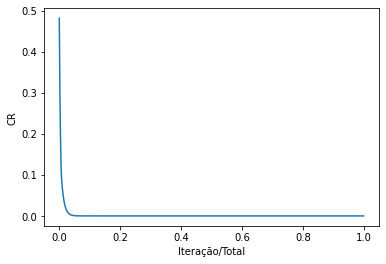

In [35]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

In [36]:
df.columns

Index(['DIVERSIDADE (DI)', 'DI RELATIVO', 'FRAC Its', 'VELOC FOBJ', 'VELOC X',
       'NP', 'Fo', 'CRo', 'fmin', 'fmax', 'AD_fmin', 'AD_fmax', 'DELTA FOBJ',
       'DELTA VX', 'r_fitness', 'F', 'CR'],
      dtype='object')

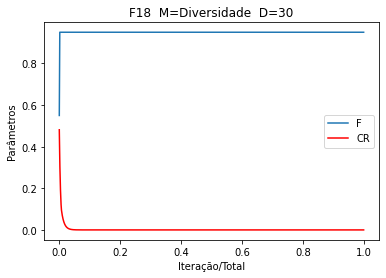

In [37]:
fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()

Text(0.5, 1.0, 'F18_Diversidade_D=30')

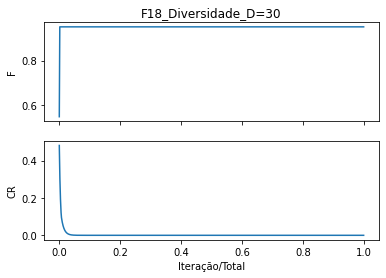

In [38]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)

In [39]:
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()    

In [40]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 1.00 NPAR= 5 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F18
SUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 

MÉDIA:  154408.6572454782 STD __: 112267.77474621538
MIN __: 37107.235777413975 MAX__:  620846.7197369317
154408.6572454782
112267.77474621538
37107.235777413975
Tempo Médio= 252.851 segundos ---
50 Rodadas

BEST:  [ 5.10060223e+01  1.08527298e+01  7.75643633e+01 -7.00641864e+01
  1.29791937e+01 -3.15072061e+01  5.59100623e+01 -4.89251338e+01
 -1.01896943e+01 -1.71685669e+01  5.17172779e+01  2.64502049e+01
 -4.86426506e+01 -2.86800012e+01 -6.03936584e+01  3.05753588e+01
  1.26550203e+01 -5.36509962e+01 -5.52271143e+01 -1.41592968e+00
  6.51022988e+01  4.48619014e+00 -7.70698117e+01 -7.06801738e+01
  4.78506513e+01 -3.14875542e+00 -1.73159685e+01  4.79096287e+01
 -2.06018512e+01  5.67128517e+00  3.71072358e+04]


In [41]:
len(Xarq)

0

In [42]:
setANN

array([0.1 , 0.05, 3.  , 1.  , 3.  , 1.  ])

In [43]:
len(MF)

6